<a href="https://colab.research.google.com/github/bkokalari/Doctoranytime-Automatic-Review-Acceptance-Model/blob/main/Greek/Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install greek-stemmer
!python -m spacy download el # greek lang
!python -m spacy download el_core_news_sm
!pip install Unidecode

✔ Download and installation successful
You can now load the model via spacy.load('el_core_news_sm')
✔ Linking successful
/usr/local/lib/python3.6/dist-packages/el_core_news_sm -->
/usr/local/lib/python3.6/dist-packages/spacy/data/el
You can now load the model via spacy.load('el')
✔ Download and installation successful
You can now load the model via spacy.load('el_core_news_sm')


In [ ]:
import pandas as pd
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
from IPython.core.display import HTML 
import spacy
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
import nltk
from spacy.lang.el.stop_words import STOP_WORDS
import itertools   
from spacy.lang.el import Greek
import string
import el_core_news_sm
import imblearn
from collections import Counter
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from scipy import stats
from greek_stemmer import GreekStemmer
from collections import defaultdict
from wordcloud import WordCloud
%matplotlib inline

In [ ]:
revs = pd.read_csv("/content/drive/My Drive/Colab Notebooks/reviews_moderation_v2/data/Greek/augmented_greek.csv") 
revs.sample(5)
revs.dropna()
revs['review'] = revs['review'].astype(str)

In [ ]:
def create_corpus(df, approved):
    """
    Create corpus based on the approved status.
    """
    corpus = []

    for x in df[df["approved"] == approved].review.str.split():
        for i in x:
            corpus.append(i)
    return corpus

In [ ]:
el_stop = [
    'αν', 'απ', 'απο', 'ας', 'για', 'γιατι', 'εγω', 'ειναι', 'ενα',
    'εσυ', 'ετσι', 'εχει', 'η', 'ηταν', 'θα', 'και', 'και', 'κι', 'μα', 'μας',
    'με', 'μες', 'μη', 'μην', 'μια', 'μου', 'μου', 'μου,', 'μ’', 'ν', 'να', 'ο',
    'οι', 'ομως', 'οπως', 'οταν', 'οτι', 'πια', 'πιο', 'που', 'πως', 'πως', 'σ',
    'σαν', 'σε', 'σου', 'σου', 'σου', 'στα', 'στη', 'στην', 'στις', 'στο', 'στον',
    'τ', 'τα', 'τη', 'την', 'της', 'τι', 'τις', 'το', 'τον', 'του', 'τους', 'των'
]


#stop = set(stopwords.words("greek"))
#stop= el_stop
stop = el_stop

In [ ]:
corpus0 = create_corpus(df=revs, approved =0)
corpus1 = create_corpus(df=revs, approved =1)

d0 = defaultdict(int)
for word in corpus0:
    if word in stop:
        d0[word] += 1

d1 = defaultdict(int)
for word in corpus1:
    if word in stop:
        d1[word] += 1

In [ ]:
top0 = sorted(d0.items(), key=lambda x: x[1], reverse=True)[:10]
top1 = sorted(d1.items(), key=lambda x: x[1], reverse=True)[:10]

In [ ]:
x0, y0 = zip(*top0)
x1, y1 = zip(*top1)

Text(0, 0.5, 'Number of occurences')

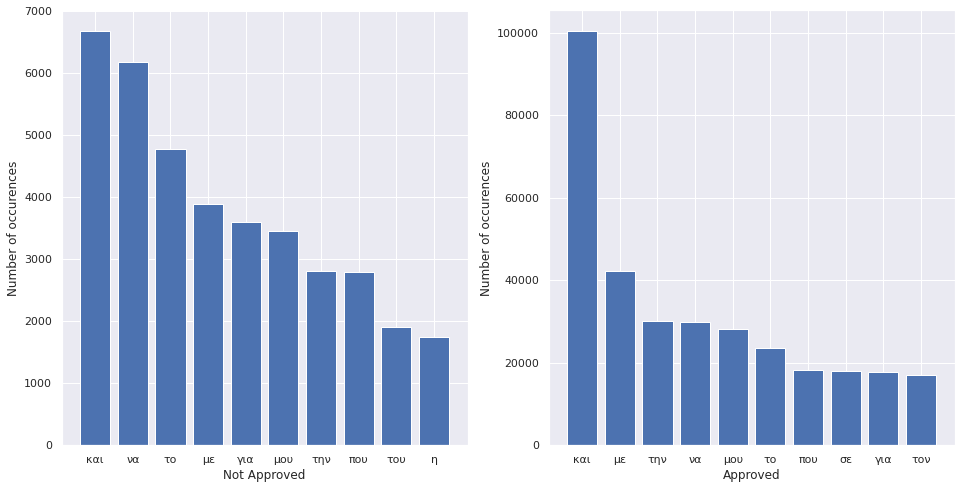

In [ ]:
sns.set()
plt.figure(1, figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.bar(x0, y0)
plt.xlabel("Not Approved")
plt.ylabel("Number of occurences")
plt.subplot(1, 2, 2)
plt.bar(x1, y1)
plt.xlabel("Approved")
plt.ylabel("Number of occurences")

In [ ]:
punc0 = defaultdict(int)
for word in corpus0:
    if word in string.punctuation:
        punc0[word] += 1

punc1 = defaultdict(int)
for word in corpus1:
    if word in string.punctuation:
        punc1[word] += 1

Text(0, 0.5, 'Number of occurences')

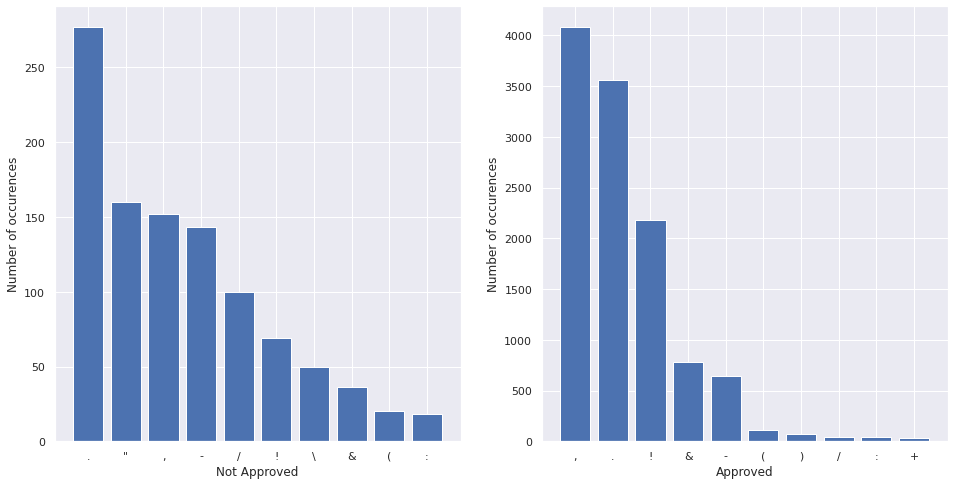

In [ ]:
top0 = sorted(punc0.items(), key=lambda x: x[1], reverse=True)[:10]
top1 = sorted(punc1.items(), key=lambda x: x[1], reverse=True)[:10]

x0, y0 = zip(*top0)
x1, y1 = zip(*top1)

plt.figure(1, figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.bar(x0, y0)
plt.xlabel("Not Approved")
plt.ylabel("Number of occurences")
plt.subplot(1, 2, 2)
plt.bar(x1, y1)
plt.xlabel("Approved")
plt.ylabel("Number of occurences")

## Preprocessed Greek Text

In [ ]:
revs_preprocessed = pd.read_csv("/content/drive/My Drive/Colab Notebooks/reviews_moderation_v2/data/Greek/preprocessed_Greek.csv") 
revs_preprocessed.sample(5)
revs_preprocessed.dropna()
revs_preprocessed['review'] = revs_preprocessed['review'].astype(str)

In [ ]:
revs_preprocessed

,review,approved
0,καθησυχαστικη εμπειρη αποτελεσματικη,1
1,υπεροχος ανθρωπος κανει εμπιστευτεις εισαι ανε...,1
2,γιατρος εξαιρετικος γνωστης αντικειμενου επεξη...,1
3,ενεπνευσε εμπιστοσυνη ειπα πραγματα δεν εχω ξα...,1
4,πολυ καλος γιατρος συστηνω ανεπιφυλακτα απολυτ...,1
...,...,...
130299,μεγαλο αρχιδι τυπος δημιουργησε προβλημα στομα...,0
130300,καθικι δεν εχω πω τιποτε αλλο,0
130301,μετα θεραπεια αρχισα αισθανομαι ζαλαδες ένας γ...,0
130302,εβγαλα καρο εξανθηματα ολο σωμα κρεμα εδωσε εγ...,0


In [ ]:
revs_preprocessed.isna().any()

review      False
approved    False
dtype: bool

In [ ]:
revs_preprocessed.isnull().sum()

review      0
approved    0
dtype: int64

In [ ]:
corpus0 = create_corpus(df=revs_preprocessed, approved=0)
corpus1 = create_corpus(df=revs_preprocessed, approved=1)

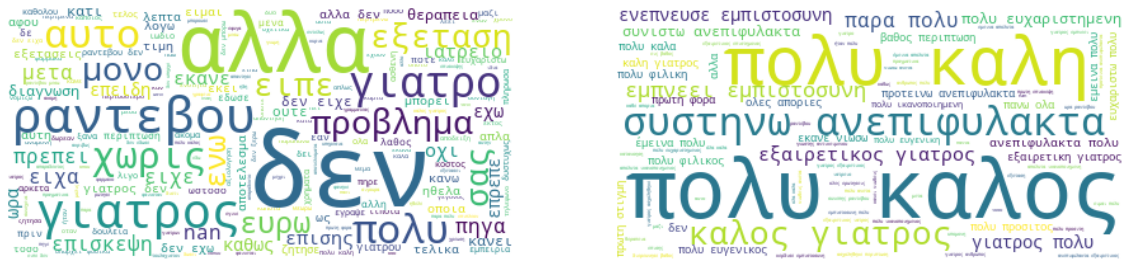

In [ ]:
#sns.set()
word_cloud0 = WordCloud(background_color="white", max_font_size=80).generate(
    " ".join(corpus0[:])
)
word_cloud1 = WordCloud(background_color="white", max_font_size=80).generate(
    " ".join(corpus1[:])
)

plt.figure(1, figsize=(20, 10))
ax1 = plt.subplot(1, 2, 1)
#ax1.set_title("Not Approved")
plt.imshow(word_cloud0, interpolation="bilinear")
plt.axis('off')
ax2 = plt.subplot(1, 2, 2)
#ax2.set_title("Approved")
plt.imshow(word_cloud1, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
stemmer = GreekStemmer()

def stemming(text):
    text = [stemmer.stem(word.upper()) for word in text.split()]

    return " ".join(text)

In [ ]:
revs_preprocessed["review"] = revs_preprocessed["review"].map(stemming)
revs_preprocessed["review"] = revs_preprocessed.review.str.lower()

In [ ]:
corpus0 = create_corpus(df=revs_preprocessed, approved=0)
corpus1 = create_corpus(df=revs_preprocessed, approved=1)

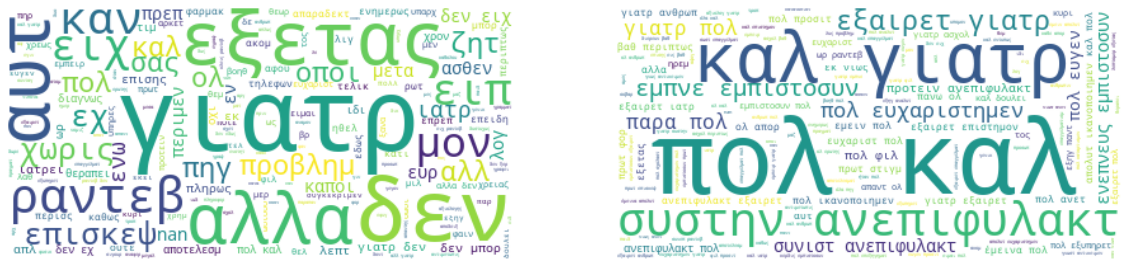

In [ ]:
#sns.set()
word_cloud0 = WordCloud(background_color="white", max_font_size=80).generate(
    " ".join(corpus0[:])
)
word_cloud1 = WordCloud(background_color="white", max_font_size=80).generate(
    " ".join(corpus1[:])
)

plt.figure(1, figsize=(20, 10))
ax1 = plt.subplot(1, 2, 1)
#ax1.set_title("Not Approved")
plt.imshow(word_cloud0, interpolation="bilinear")
plt.axis('off')
ax2 = plt.subplot(1, 2, 2)
#ax2.set_title("Approved")
plt.imshow(word_cloud1, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
revs_preprocessed.review.iloc[1]

'υπεροχ ανθρωπ καν εμπιστευτ εισαι ανετ μαζ'

In [ ]:
revs_preprocessed["Text Length"] = revs_preprocessed["review"].apply(lambda x: len(x))

In [ ]:
revs_preprocessed["Text Length"]= revs_preprocessed["review"].str.len() 

In [ ]:
revs_preprocessed

,review,approved,Text Length
0,καθησυχαστ εμπειρ αποτελεσματ,1,29
1,υπεροχ ανθρωπ καν εμπιστευτ εισαι ανετ μαζ,1,42
2,γιατρ εξαιρετ γνωστ αντικειμεν επεξηγηματ,1,41
3,ενεπνευς εμπιστοσυν ειπ πραγμ δεν εχ ξαναπ ποτ...,1,76
4,πολ καλ γιατρ συστην ανεπιφυλακτ απολυτ καταρτ...,1,51
...,...,...,...
130299,μεγαλ αρχιδ τυπ δημιουργ προβλημ στομαχ ολ αυτ...,0,58
130300,καθικ δεν εχ πω τιποτε αλλ,0,26
130301,μετα θεραπει αρχις αισθαν ζαλαδ ένας γιατρ δε ...,0,60
130302,εβγαλ καρ εξανθημ ολ σωμ κρεμ εδως εγκληματ,0,43


In [ ]:
revs_preprocessed.groupby(by="Text Length").sum()[0:60]

,approved
Text Length,
1,57
2,42
3,2771
4,376
5,753
6,1307
7,5819
8,731
9,934


In [ ]:
import statistics

median = statistics.median(revs_preprocessed["Text Length"])
mean = statistics.mean(revs_preprocessed["Text Length"])
print(round(median),",", round(mean))

41 , 60


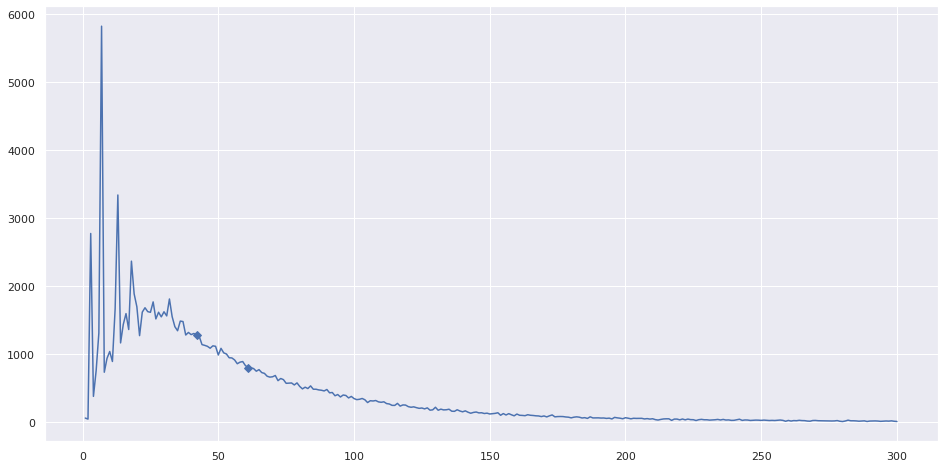

In [ ]:
plt.figure(1, figsize=(16, 8))
markers_on = [41,60]
plt.plot(revs_preprocessed.groupby(by="Text Length").sum()[:300], '-D', markevery=markers_on)
plt.show()